<a href="https://colab.research.google.com/github/rojipbabu/Video_Gaming_1980_2016/blob/main/Clustering_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

## CLUSTERING THE DATA (which method should i use?)

In [ ]:
vg=pd.read_csv("vgsales.csv")

In [ ]:
vg.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [ ]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
actshoo=vg[(vg['Genre']=='Shooter') | (vg['Genre']=='Action')]

In [ ]:
actshoo=actshoo[actshoo['Year']>=2010]

In [ ]:
actshoo['Platform'].value_counts()

PS3     373
X360    297
3DS     186
PC      170
PS4     156
PSV     146
PSP     109
Wii     108
DS      108
XOne    101
WiiU     73
PS2       7
Name: Platform, dtype: int64

In [ ]:
vg.dropna(inplace=True)

In [ ]:
x=vg.iloc[:,6:11].values

In [ ]:
vg

Rank                                               Name Platform  \
0        259                                          Asteroids     2600   
1        545                                    Missile Command     2600   
2       1768                                            Kaboom!     2600   
3       1971                                           Defender     2600   
4       2671                                             Boxing     2600   
...      ...                                                ...      ...   
16319  16565                                       Mighty No. 9     XOne   
16320  16572                                 Resident Evil 4 HD     XOne   
16321  16573                      Farming 2017 - The Simulation      PS4   
16322  16579                                  Rugby Challenge 3     XOne   
16323  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

       Year       Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      1980     Shooter                 Atari      4.00      0.26      0.00   
1      1980     Shooter                 Atari      2.56      0.17      0.00   
2      1980        Misc            Activision      1.07      0.07      0.00   
3      1980        Misc                 Atari      0.99      0.05      0.00   
4      1980    Fighting            Activision      0.72      0.04      0.00   
...     ...         ...                   ...       ...       ...       ...   
16319  2016    Platform           Deep Silver      0.01      0.00      0.00   
16320  2016     Shooter                Capcom      0.01      0.00      0.00   
16321  2016  Simulation     UIG Entertainment      0.00      0.01      0.00   
16322  2016      Sports  Alternative Software      0.00      0.01      0.00   
16323  2016      Action       dramatic create      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
0             0.05          4.31  
1             0.03          2.76  
2             0.01          1.15  
3             0.01          1.05  
4             0.01          0.77  
...            ...           ...  
16319         0.00          0.01  
16320         0.00          0.01  
16321         0.00          0.01  
16322         0.00          0.01  
16323         0.00          0.01  

[16288 rows x 11 columns]

In [ ]:
x

array([[4.  , 0.26, 0.  , 0.05, 4.31],
       [2.56, 0.17, 0.  , 0.03, 2.76],
       [1.07, 0.07, 0.  , 0.01, 1.15],
       ...,
       [0.  , 0.01, 0.  , 0.  , 0.01],
       [0.  , 0.01, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.01, 0.  , 0.01]])

In [ ]:
wcc=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcc.append(kmeans.inertia_)

Text(0.5, 1.0, 'elbow graph')

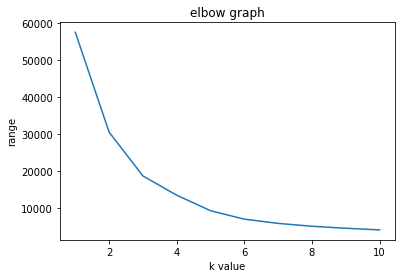

In [ ]:
plt.plot(range(1,11),wcc)
plt.xlabel("k value")
plt.ylabel("range")
plt.title("elbow graph")

In [ ]:
from sklearn.metrics import silhouette_score

# Load your data and perform clustering
# Assuming you have a feature matrix 'X' and the number of clusters 'n_clusters'
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(x)

# Calculate the silhouette score
silhouette_avg = silhouette_score(x, cluster_labels)

print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.8670747481300722


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[ 0.17145058,  0.0885456 ,  0.05533893,  0.03001909,  0.34564127],
       [ 2.3382971 ,  1.50603261,  0.58875   ,  0.46740942,  4.9003442 ],
       [13.73      ,  7.3688    ,  3.592     ,  2.3708    , 27.0624    ]])

In [ ]:
vg['Clusters']=kmeans.labels_
vg['Clusters'].value_counts()

0    15711
1      552
2       25
Name: Clusters, dtype: int64

In [ ]:
fig = px.scatter(data_frame=vg,
    x='NA_Sales',
    y='Global_Sales',
    color='Clusters',hover_data=['Platform', 'Publisher', 'Year','Name'])

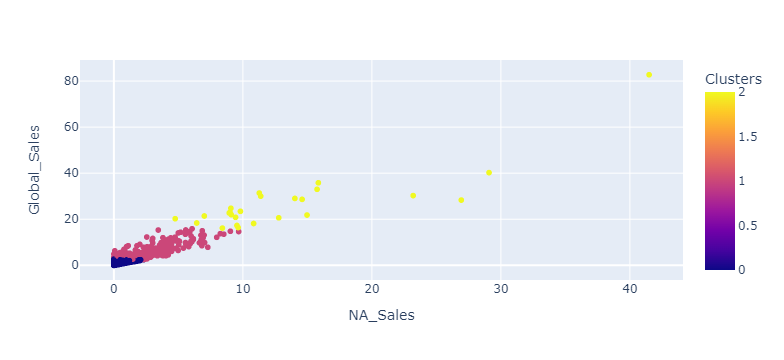

In [ ]:
fig

### WE CAN DIVIDE THE DATA BASED ON THE CLUSTER. LIKE LOW SELLING GAMES,MID SELLING GAMES AND MEDIUM SELLING GAMES ANG HIGH SELLING GAMES.

In [ ]:
vglow=vg[vg['Clusters']==0]

In [ ]:
vgmid=vg[vg['Clusters']==1]

In [ ]:
vghigh=vg[vg['Clusters']==2]

In [ ]:
vgvhigh=vg[vg['Clusters']==5]

In [ ]:
vgvhigh

Rank        Name Platform  Year   Genre Publisher  NA_Sales  EU_Sales  \
6112     1  Wii Sports      Wii  2006  Sports  Nintendo     41.49     29.02   

      JP_Sales  Other_Sales  Global_Sales  Clusters  Cluster  
6112      3.77         8.46         82.74         5       -1

## CLUSTER ANALYSIS

In [ ]:
##this is the total games in our dataset
vg.shape[0]

16288

In [ ]:
#### The percentage of games in each category
print("THE PERCENTAGE OF LOW SALES GAMES IS",vglow.shape[0]/vg.shape[0]*100)
print("THE PERCENTAGE OF MID SALES GAMES IS",vgmid.shape[0]/vg.shape[0]*100)
print("THE PERCENTAGE OF HIGH SALES GAMES IS",vghigh.shape[0]/vg.shape[0]*100)


THE PERCENTAGE OF LOW SALES GAMES IS 96.45751473477407
THE PERCENTAGE OF MID SALES GAMES IS 3.388998035363458
THE PERCENTAGE OF HIGH SALES GAMES IS 0.15348722986247543


In [ ]:
vglow.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  15711.000000  15711.000000  15711.000000  15711.000000  15711.000000   
mean    8582.518236   2006.452613      0.171451      0.088546      0.055339   
std     4622.860670      5.768461      0.267709      0.167900      0.166117   
min      447.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4575.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8588.000000   2007.000000      0.070000      0.020000      0.000000   
75%    12584.500000   2010.000000      0.210000      0.090000      0.030000   
max    16600.000000   2016.000000      2.300000      2.000000      3.030000   

        Other_Sales  Global_Sales  Clusters  
count  15711.000000  15711.000000   15711.0  
mean       0.030019      0.345641       0.0  
std        0.068676      0.461140       0.0  
min        0.000000      0.010000       0.0  
25%        0.000000      0.060000       0.0  
50%        0.010000      0.160000       0.0  
75%        0.030000      0.420000       0.0  
max        2.050000      3.120000       0.0

In [ ]:
vgmid.describe()

Rank         Year    NA_Sales    EU_Sales   JP_Sales  \
count  552.000000   552.000000  552.000000  552.000000  552.00000   
mean   304.605072  2005.213768    2.338297    1.506033    0.58875   
std    163.368644     7.070654    1.465323    1.089146    0.98988   
min     26.000000  1980.000000    0.000000    0.000000    0.00000   
25%    163.750000  2001.000000    1.447500    0.817500    0.02000   
50%    302.500000  2007.000000    2.015000    1.245000    0.10000   
75%    442.250000  2011.000000    2.820000    1.942500    0.80000   
max    632.000000  2016.000000    9.670000    6.420000    5.65000   

       Other_Sales  Global_Sales  Clusters  
count   552.000000    552.000000     552.0  
mean      0.467409      4.900344       1.0  
std       0.503675      2.633245       0.0  
min       0.000000      2.440000       1.0  
25%       0.190000      3.127500       1.0  
50%       0.350000      3.985000       1.0  
75%       0.610000      5.475000       1.0  
max       7.530000     15.850000       1.0

In [ ]:
vghigh.describe()

Rank         Year   NA_Sales   EU_Sales  JP_Sales  Other_Sales  \
count  25.000000    25.000000  25.000000  25.000000  25.00000    25.000000   
mean   13.000000  2001.720000  13.730000   7.368800   3.59200     2.370800   
std     7.359801     8.997778   8.332446   5.597028   2.50267     2.394768   
min     1.000000  1984.000000   4.750000   0.400000   0.06000     0.420000   
25%     7.000000  1996.000000   9.070000   3.750000   1.93000     0.770000   
50%    13.000000  2005.000000  10.830000   7.060000   3.77000     1.790000   
75%    19.000000  2008.000000  14.970000   9.230000   4.22000     2.850000   
max    25.000000  2013.000000  41.490000  29.020000  10.22000    10.570000   

       Global_Sales  Clusters  
count     25.000000      25.0  
mean      27.062400       2.0  
std       13.198724       0.0  
min       16.150000       2.0  
25%       20.610000       2.0  
50%       23.100000       2.0  
75%       30.010000       2.0  
max       82.740000       2.0

In [ ]:
vghigh['Year'].value_counts()

2006    4
2005    3
2009    3
1989    2
2013    2
1984    1
1985    1
1988    1
1990    1
1996    1
1999    1
2002    1
2004    1
2007    1
2008    1
2010    1
Name: Year, dtype: int64

In [ ]:
import plotly.graph_objs as go

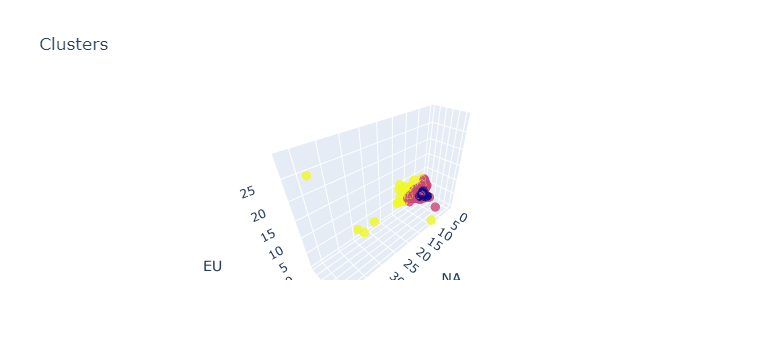

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:


trace = go.Scatter3d(
                    x = vg['NA_Sales'],
                    y = vg['Other_Sales'],
                    z = vg['EU_Sales'],
                    mode = 'markers',
                    marker=dict(color=vg['Clusters'], size = 5,  line=dict(color=vg['Clusters'], width=12), opacity=0.8)
                    )
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'NA'),
                                yaxis = dict(title = 'Other'),
                                zaxis = dict(title = 'EU'))
                                )


fig = go.Figure(data=trace,layout=layout)
py.offline.iplot(fig)
plt.show()
plt.figure(figsize=(12,8))

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
